### Import Libraries

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Load dataset

In [111]:
df = pd.read_csv("cardekho.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [112]:
df.shape

(8128, 12)

In [113]:
df.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


### Data preprocessing

In [115]:
### I drop the max_power since engine capacity is already accounted
df.drop('max_power', axis=1, inplace=True)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,5.0


##### Checking missing values

In [116]:
df.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
seats                 221
dtype: int64

##### Mean imputation for null values

In [117]:
# Select the columns with missing values
cols_with_missing = ['mileage(km/ltr/kg)', 'engine', 'seats']

# Impute missing values with mean 
df_imputed = df[cols_with_missing].copy()
df_imputed = df_imputed.fillna(df_imputed.mean())

# Combine the imputed data with the original DataFrame
df = pd.concat([df.drop(cols_with_missing, axis=1), df_imputed], axis=1)
df.isnull().sum()

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
seats                 0
dtype: int64

##### Checking the non numeric values

In [118]:
# Select the numeric columns
numeric_cols = ['year', 'selling_price', 'km_driven', 'mileage(km/ltr/kg)', 'engine', 'seats']

# Create a dictionary to store non-numeric value counts for each column
non_numeric_counts = {}

# Loop through each numeric column and count non-numeric values
for col in numeric_cols:
  # Count non-numeric values using ~ (bitwise NOT) with isnull()
  non_numeric_counts[col] = df[~df[col].notnull()].shape[0]

# Print the non-numeric value counts
print("Non-numeric value counts:")
for col, count in non_numeric_counts.items():
  print(f"  - Column '{col}': {count}")

Non-numeric value counts:
  - Column 'year': 0
  - Column 'selling_price': 0
  - Column 'km_driven': 0
  - Column 'mileage(km/ltr/kg)': 0
  - Column 'engine': 0
  - Column 'seats': 0


##### Label encoding

In [119]:
# Select the categorical features 
categorical_cols = ['name','fuel', 'seller_type', 'transmission', 'owner']

# Function to check distinct variable counts
def check_distinct_counts(df, cols):

  for col in cols:
    if df[col].dtype == object:  # Check if it's a categorical column
      num_distinct = df[col].nunique()
      print(f"Column '{col}' has {num_distinct} distinct categories.")
    else:
      print(f"Column '{col}' is not a categorical feature.")

# Check distinct counts in categorical features
check_distinct_counts(df.copy(), categorical_cols)

Column 'name' has 2058 distinct categories.
Column 'fuel' has 4 distinct categories.
Column 'seller_type' has 3 distinct categories.
Column 'transmission' has 2 distinct categories.
Column 'owner' has 5 distinct categories.


In [120]:
# Create a LabelEncoder object
le = LabelEncoder()

# Encode and drop original categorical columns
encoded_df = df.copy()  # Create a copy to avoid modifying the original data
for col in categorical_cols:
  if encoded_df[col].dtype == object:  # Check if it's a categorical column
    encoded_df[col] = le.fit_transform(encoded_df[col])
    df.drop(col, axis=1)  # Drop the original column after encoding

print(encoded_df.head())  

   name  year  selling_price  km_driven  fuel  seller_type  transmission  \
0  1307  2014         450000     145500     1            1             1   
1  1607  2014         370000     120000     1            1             1   
2   385  2006         158000     140000     3            1             1   
3   781  2010         225000     127000     1            1             1   
4  1349  2007         130000     120000     3            1             1   

   owner  mileage(km/ltr/kg)  engine  seats  
0      0               23.40  1248.0    5.0  
1      2               21.14  1498.0    5.0  
2      4               17.70  1497.0    5.0  
3      0               23.00  1396.0    5.0  
4      0               16.10  1298.0    5.0  


### Exploratory Data Analysis

##### Checking the outliers

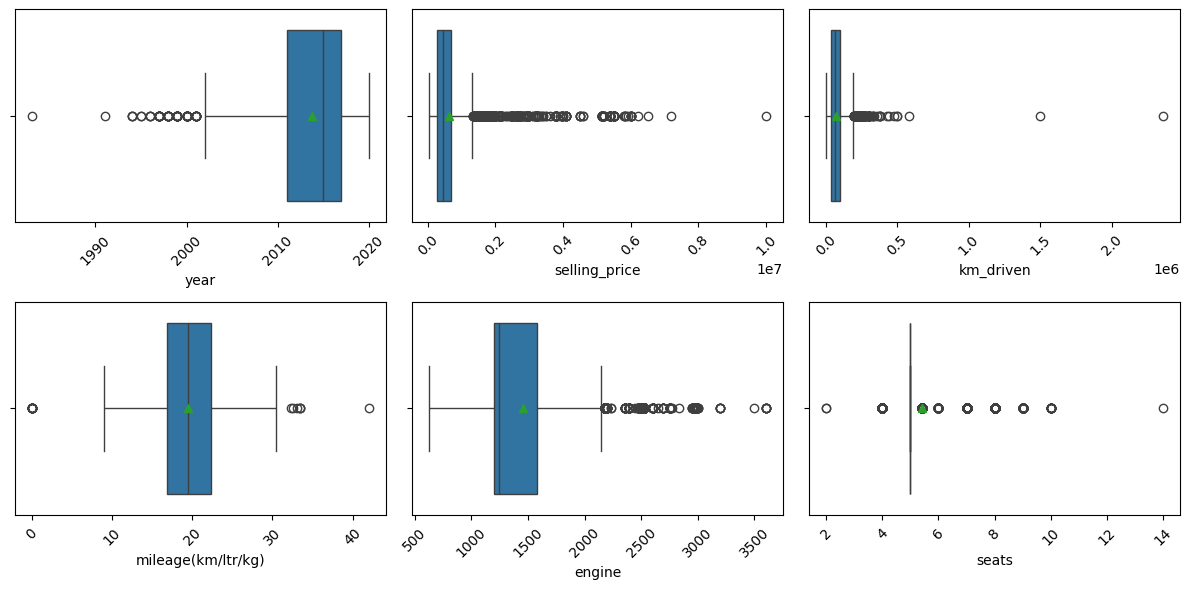

In [139]:
# Create a figure for plotting boxplots
plt.figure(figsize=(12, 6))

# Loop through each numeric column and create a boxplot
for i, col in enumerate(numeric_cols):
  # Create a subplot for each column
  plt.subplot(2, 3, i + 1) 
  sns.boxplot(
      x = col,
      showmeans=True,  
      data=encoded_df
  )
  # Rotate x-axis labels for better readability
  plt.xticks(rotation=45)
  plt.tight_layout()  # Adjust spacing between subplots

# Display the boxplot figure
plt.show()

##### Visualising numerical variables

In [122]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
0,2014,450000,145500,23.40,1248.0,5.0
1,2014,370000,120000,21.14,1498.0,5.0
2,2006,158000,140000,17.70,1497.0,5.0
3,2010,225000,127000,23.00,1396.0,5.0
4,2007,130000,120000,16.10,1298.0,5.0


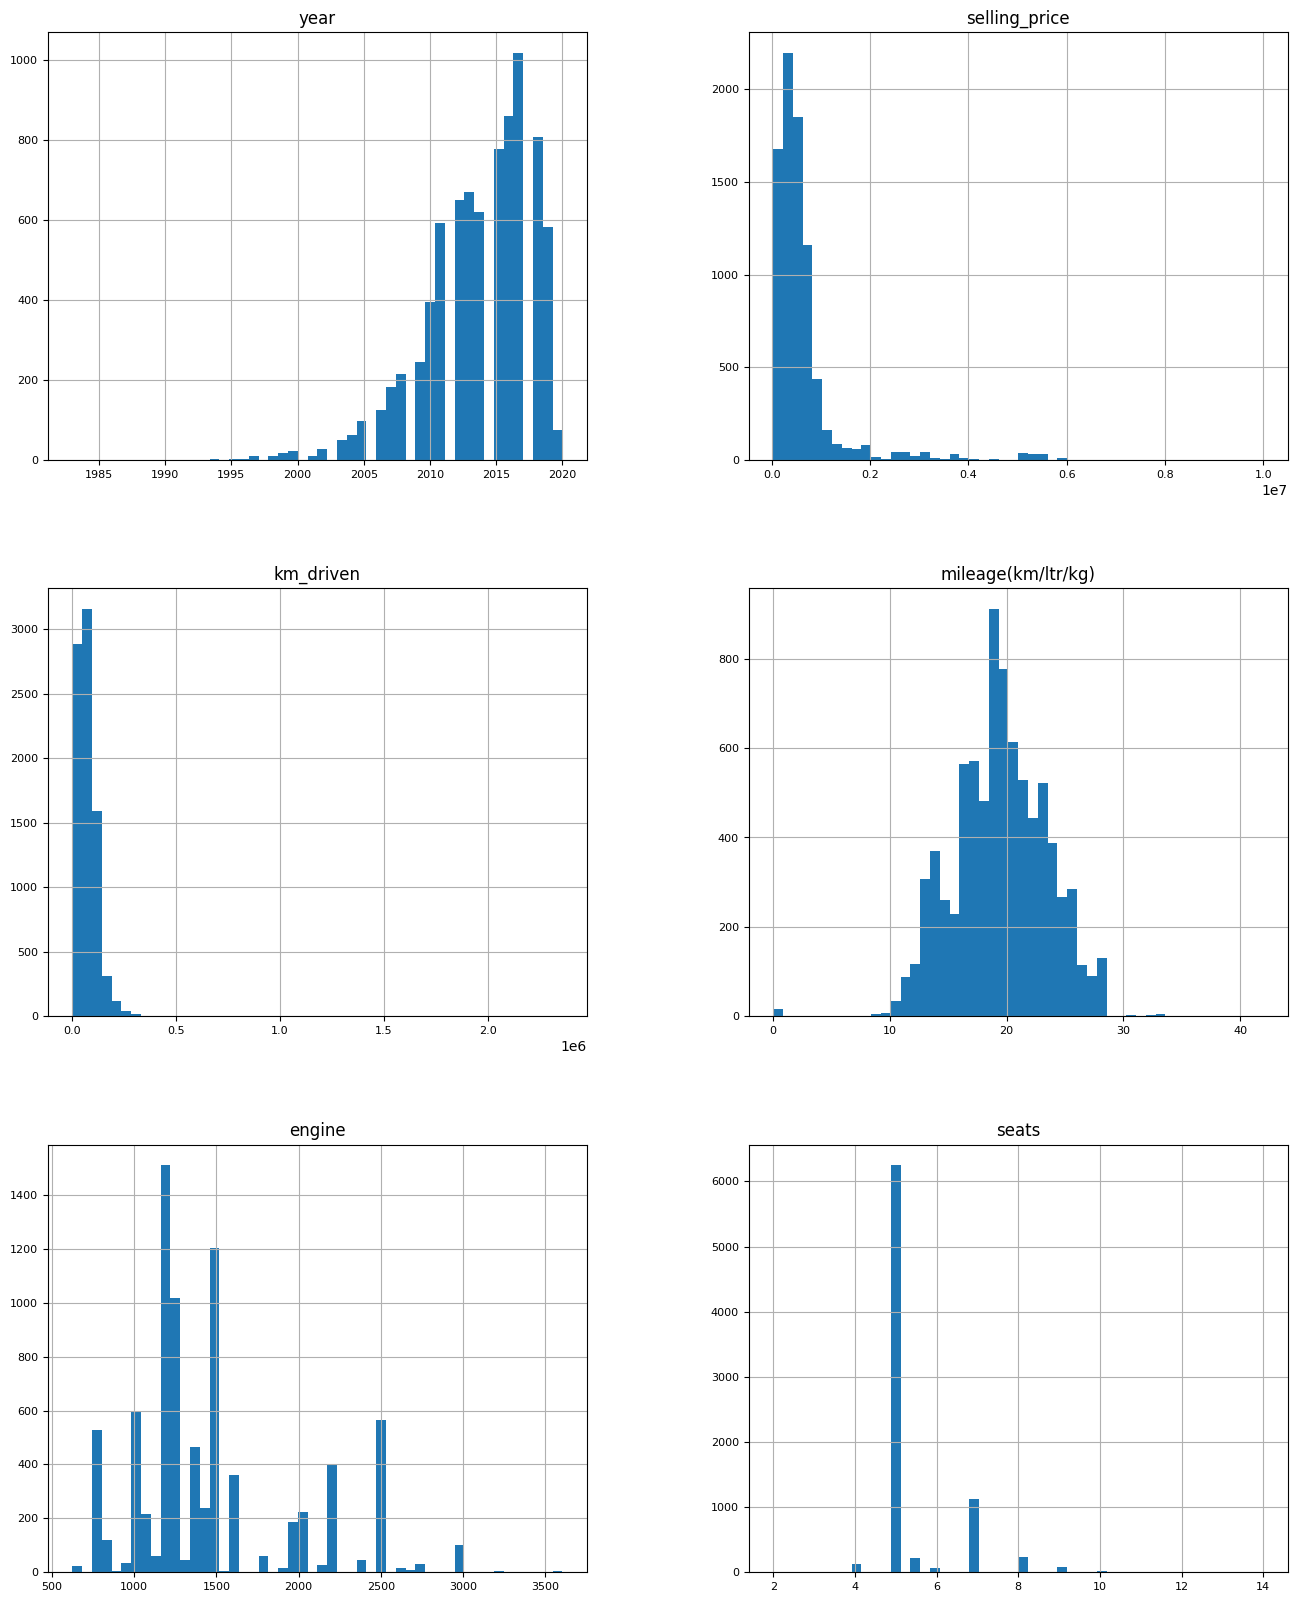

In [123]:
# Plot the distribution for all the numerical features
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);
plt.show()

We can observe that selling price has a positively skewed shape

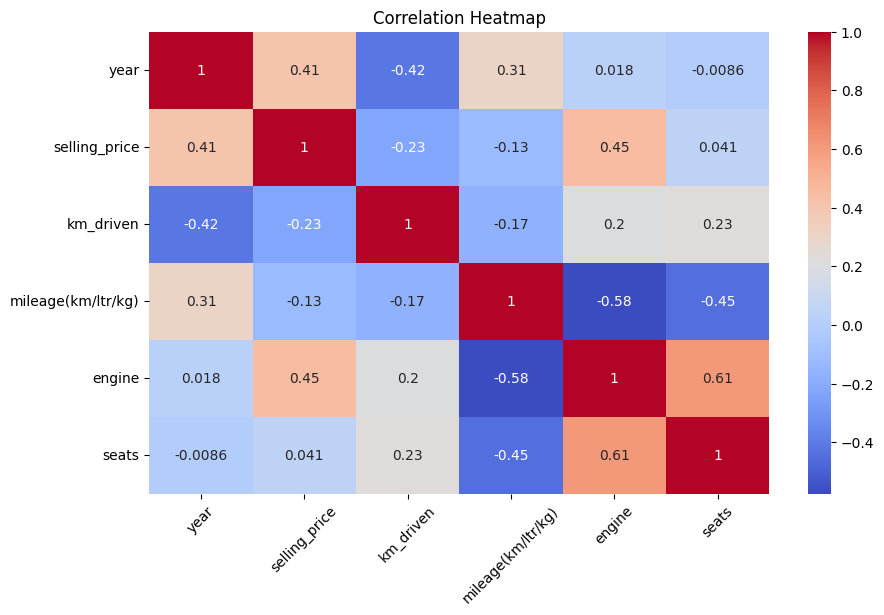

In [134]:
# Calculate the correlation matrix
correlation_matrix = df_num.corr()

# Create a new figure for the heatmap
plt.figure(figsize=(10, 6))  

# Generate the heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm') 

# Add a title to the heatmap
plt.title('Correlation Heatmap')

plt.xticks(rotation=45)
plt.show()

By looking at this plot we can observe that engine capacity and the manufactured year of the car is positively correlate with the selling price while kilometers driven and the mileage of the car negatively correlate with the selling price.

##### Visualising categorical variables

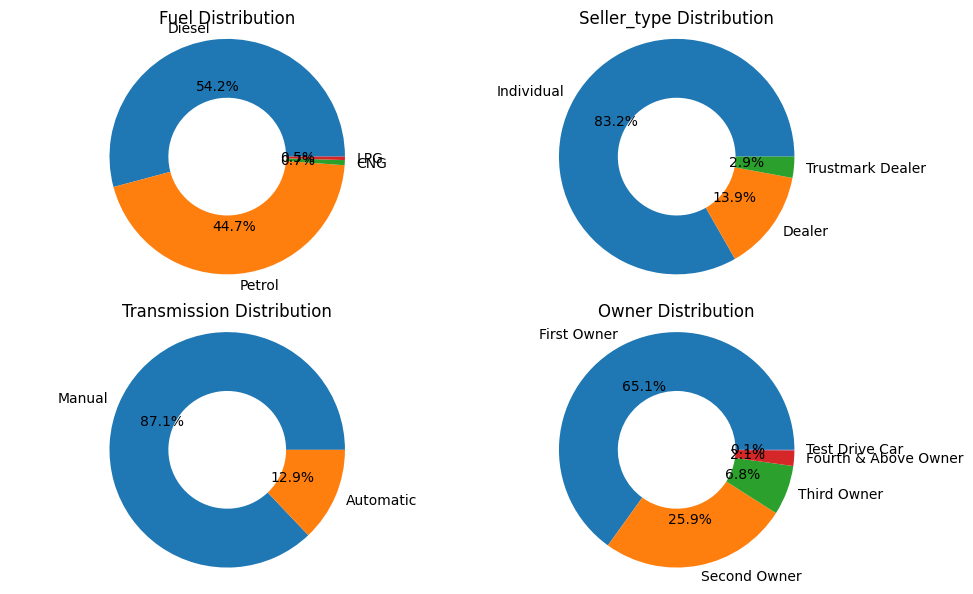

In [149]:
rows = 2
cols = 2

# Create the figure and subplots
fig, axes = plt.subplots(rows, cols, figsize=(10, 6))  

features = ['fuel', 'seller_type', 'transmission', 'owner']
feature_counts = [df[f].value_counts() for f in features]

# Create pie charts for each feature in a subplot
for i, (feature, counts) in enumerate(zip(features, feature_counts)):
    row, col = divmod(i, cols)  # Calculate row and column index for each subplot
    axes[row, col].pie(counts, labels=counts.index, autopct="%1.1f%%", wedgeprops=dict(width=0.5))
    axes[row, col].set_title(f"{feature.capitalize()} Distribution")
    axes[row, col].axis('equal')  # Equal aspect ratio for circular pie charts

plt.tight_layout()
plt.show()


C:\Users\ANUDI NILNUWANI\AppData\Local\Temp\ipykernel_11220\777137595.py:2: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



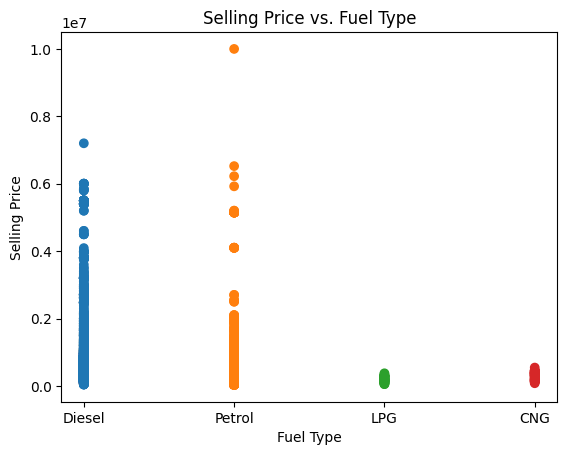

In [155]:
import matplotlib.cm as cm
cmap = cm.get_cmap('tab10') 

plt.scatter(df["fuel"],df["selling_price"], c=cmap(df['fuel'].factorize()[0]))  
plt.title("Selling Price vs. Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.show()

Selling price is higher for the Diesel and petrol vehicles.

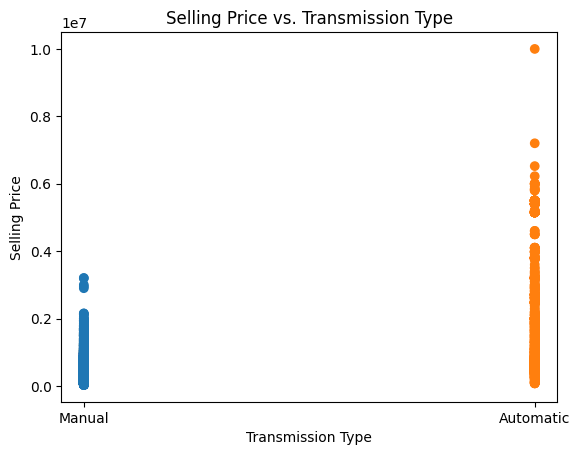

In [157]:
plt.scatter(df["transmission"],df["selling_price"], c=cmap(df['transmission'].factorize()[0]))  
plt.title("Selling Price vs. Transmission Type")
plt.xlabel("Transmission Type")
plt.ylabel("Selling Price")
plt.show()

Selling price is higher for the automatic vehicles.

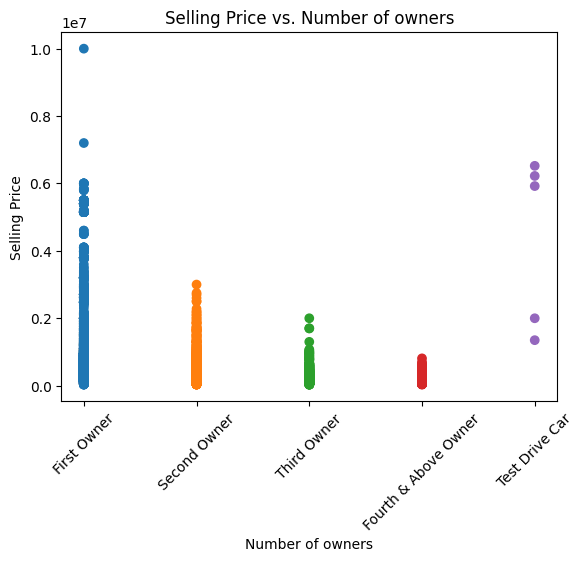

In [158]:
plt.scatter(df["owner"],df["selling_price"], c=cmap(df['owner'].factorize()[0])) 
plt.title("Selling Price vs. Number of owners")
plt.xlabel("Number of owners")
plt.ylabel("Selling Price")
plt.xticks(rotation=45)
plt.show()

Selling price is reletively higher if it is a first owner car.

#### Split data

In [126]:
# Define features (X) and target variable (y)
X = encoded_df.drop('selling_price', axis=1)  # Replace 'target_variable_name' with your actual target
y = encoded_df['selling_price']

# Split data into training and testing sets (default 75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Now you have training and testing sets for X (features) and y (target variable)
print("Training data shapes:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")

print("Testing data shapes:")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

Training data shapes:
X_train: (6096, 10)
y_train: (6096,)
Testing data shapes:
X_test: (2032, 10)
y_test: (2032,)


### Model Development

In [131]:
# Since this data is not highly linear and data has significat outlier I try the follwing regression models and choose the best model
# Linear Regression
# Gradient Boosting Regressor
# random forest Regression
# Support Vector Regression (SVR)

##### Train the model

In [128]:
# Define models to evaluate
models = [
  ("Linear Regression", LinearRegression()),
  ("Random Forest", RandomForestRegressor()),
  ("Gradient Boosting", GradientBoostingRegressor()),
  ("Support Vector (SVR)", SVR()),
]

# Evaluate each model
best_model_name = None
best_mse = float('inf')  # Initialize with positive infinity

for name, model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  print(f"{name} MSE: {mse:.2f}")

  # Update best model if current MSE is lower
  if mse < best_mse:
    best_model_name = name
    best_mse = mse

# Print the best model
print(f"\nBest Model: {best_model_name}")

Linear Regression MSE: 253512840276.06
Random Forest MSE: 28268664910.25
Gradient Boosting MSE: 39748811870.83
Support Vector (SVR) MSE: 657839882125.63

Best Model: Random Forest


Lower the MSE better the model. So I continue analysis with the Random Forest Model

In [132]:
# Create a new Random Forest object (assuming you don't have a trained model)
rf_model = RandomForestRegressor()

# Fit the model to your training data (assuming you have it)
# Replace with your actual training data (X_train, y_train)
rf_model.fit(X_train, y_train)  # Replace with your training data

RandomForestRegressor()

##### Evaluate the model

In [133]:
# Make predictions on the test data using the Random Forest model
y_pred = rf_model.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)  # Replace y_test with actual test target values

# Print the R-squared score
print("R-squared Score:", r2)

# Print the predicted sales prices (optional)
print("Predicted Sales Prices:")
print(y_pred[:10]) 

R-squared Score: 0.9555605347858379
Predicted Sales Prices:
[159805.         557969.94       533959.7        169622.95
 377149.93       186416.66666667 384190.         525810.
 145430.          82555.67333333]


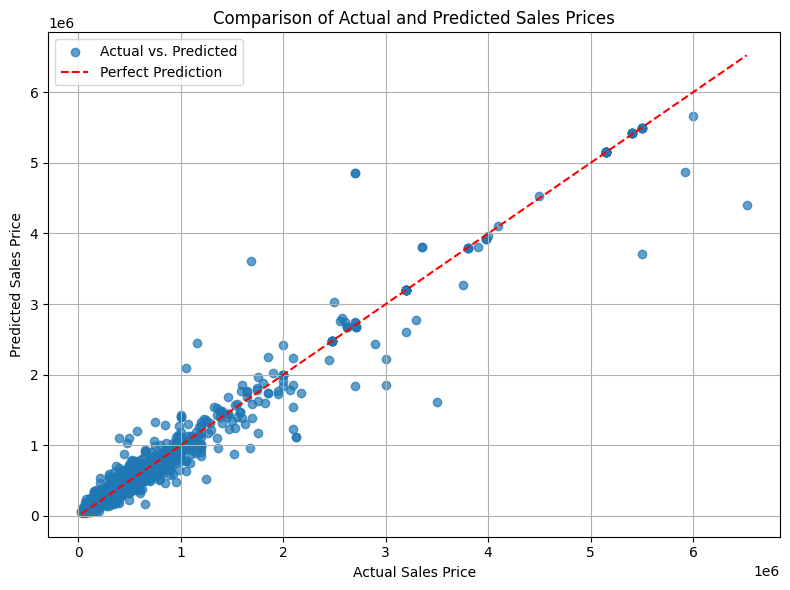

In [130]:
# Scatter plot to compare actual vs. predicted sales prices
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(y_test, y_pred, alpha=0.7, label='Actual vs. Predicted')
plt.xlabel('Actual Sales Price')
plt.ylabel('Predicted Sales Price')
plt.title('Comparison of Actual and Predicted Sales Prices')

# Add a diagonal line for reference (optional)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

# Add legend (optional)
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

As a conclusion, 95.73% of the variation in the actual values of selling price can be explained by the Random forest regression model.